28

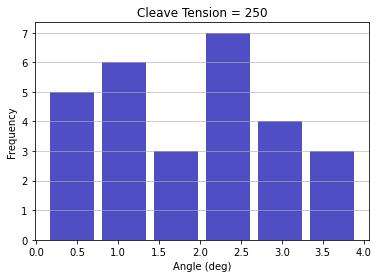

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import sklearn
import math
from sklearn.linear_model import LinearRegression
import os

n=6
L=500
c=50
x_calc = np.zeros((L,n))
Y_raw = np.zeros((L,n))
Y_raw_inv = np.zeros((L,n))
Y_raw_rot = np.zeros((L,n))
theta = range(-45,45,90//(n))
clip = np.zeros((6))
angles = []

# traverse whole directory
for root, dirs, files in os.walk(r'W:\Data\WG3\Cleaving Face\250'):
    # select file name
    for file in files:
        # check the extension of files
        if file.endswith('.mat'):
            mat = scipy.io.loadmat(os.path.join(root, file)) #Load the data
            sorted(mat.keys()) #identify columns of data in the .mat file
            data = mat['Surface'] #extract the values for the surface height
            surface = np.empty([501,501])
            surface[:,:] = data
            x = np.arange(0,500,1)
            surface_rot = np.rot90(np.array(surface))
            for k in range(0,n):
                for i in range(0,L):
                    j = 250+((250-i)*math.tan(theta[k]*(math.pi/180)))
                    Y_raw[i,k] = surface[i,round(j)]
                    Y_raw_inv[i,k] = surface[round(j),(L-i)]
                Y_raw_rot[:,k] = np.flip(Y_raw_inv[:,k])
                clip[k] = round(np.count_nonzero(np.isnan(Y_raw[:,k]))/2)
                Y_raw[0:c+int(clip[k]),k] = np.NAN
                Y_raw[L-(c+int(clip[k])):L,k] = np.NAN
                Y_raw_rot[0:c+int(clip[k]),k] = np.NAN
                Y_raw_rot[L-(c+int(clip[k])):L,k] = np.NAN
                x_calc[:,k] = np.arange(0,(L*0.000329)/math.cos(theta[k]*(math.pi/180)),(L*0.000329)/math.cos(theta[k]*(math.pi/180))/L)
            grad = []
            for angle in range(0,n):
                Y = Y_raw_rot[~np.isnan(Y_raw_rot[:,angle]),angle]
                Y_fdata = Y.reshape(-1,1)
                x_crop = np.arange(0,len(Y),1)
                x_fdata = x_crop.reshape(-1,1)
                regress = LinearRegression().fit(x_fdata*0.000329,Y_fdata)
                grad.append((180/math.pi)*(math.atan(regress.coef_[0][0])))
            for angle in range(0,n):
                Y = Y_raw[~np.isnan(Y_raw[:,angle]),angle]
                Y_fdata = Y.reshape(-1,1)
                x_crop = np.arange(0,len(Y),1)
                x_fdata = x_crop.reshape(-1,1)
                regress = LinearRegression().fit(x_fdata*0.000329,Y_fdata)
                grad.append((180/math.pi)*(math.atan(regress.coef_[0][0])))
            res = [abs(ele) for ele in grad]
            angles.append(max(res))
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=angles, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angle (deg)');
plt.ylabel('Frequency');
plt.title('Cleave Tension = 250');
#plt.text(5, 5, r'$\mu=15, b=3$')
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(n.max() / 10) * 8 if n.max() % 4 else maxfreq + 2);
len(angles)

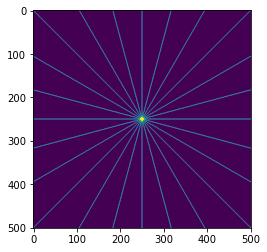

In [8]:
surftest = np.zeros((501,501))
theta = range(-45,45,90//n)
for k in range (0,n):
    for i in range (0,501):
        j = 250+((250-i)*math.tan(theta[k]*(math.pi/180)))
        surftest[i,round(j)]=1 #initial set of cross sections
        surftest[round(j),(500-i)]=1 #second set of cross sections
plt.imshow(surftest)

In [17]:
n=6
L=500
c=50
#j_list = np.zeros((L,n))
x_calc = np.zeros((L,n))
x_clip = np.zeros((L-(2*c),n))
Y_clip = np.zeros((L-(2*c),n))
Y_clip_rot = np.zeros((L-(2*c),n))
Y_raw = np.zeros((L,n))
Y_raw_inv = np.zeros((L,n))
Y_raw_rot = np.zeros((L,n))
#surftest = np.zeros((L,L))
theta = range(-45,45,90//(n))
clip = np.zeros((6))
surface_rot = np.rot90(np.array(surface))
for k in range(0,n):
    for i in range(0,L):
        j = 250+((250-i)*math.tan(theta[k]*(math.pi/180)))
        Y_raw[i,k] = surface[i,round(j)]
        Y_raw_inv[i,k] = surface[round(j),(L-i)]
    Y_raw_rot[:,k] = np.flip(Y_raw_inv[:,k])
    clip[k] = round(np.count_nonzero(np.isnan(Y_raw[:,k]))/2)
    Y_raw[0:c+int(clip[k]),k] = np.NAN
    Y_raw[L-(c+int(clip[k])):L,k] = np.NAN
    Y_raw_rot[0:c+int(clip[k]),k] = np.NAN
    Y_raw_rot[L-(c+int(clip[k])):L,k] = np.NAN
    Y_clip_rot[:,k] = Y_raw_rot[c:L-c,k]
    x_calc[:,k] = np.arange(0,(L*0.000329)/math.cos(theta[k]*(math.pi/180)),(L*0.000329)/math.cos(theta[k]*(math.pi/180))/L)
    #x_clip[:,k] = x_calc[c:L-c,k]

plt.plot(x_calc[:,0], Y_raw[:,0], x_calc[:,1], Y_raw[:,1], x_calc[:,2], Y_raw[:,2], x_calc[:,3], Y_raw[:,3], x_calc[:,4], Y_raw[:,4], x_calc[:,5], Y_raw[:,5])
plt.plot(x_calc[:,0], Y_raw_rot[:,0], x_calc[:,1], Y_raw_rot[:,1], x_calc[:,2], Y_raw_rot[:,2], x_calc[:,3], Y_raw_rot[:,3], x_calc[:,4], Y_raw_rot[:,4], x_calc[:,5], Y_raw_rot[:,5])
#plt.plot(x_calc[:,0], Y_raw[:,0], x_calc[:,1], Y_raw[:,1], x_calc[:,2], Y_raw[:,2])
#plt.plot(x_calc[:,0], Y_raw_rot[:,0], x_calc[:,1], Y_raw_rot[:,1], x_calc[:,2], Y_raw_rot[:,2])

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

0.6561985413887174

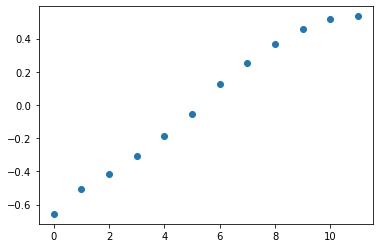

In [11]:
grad = []
for angle in range(0,n):
    Y = Y_raw_rot[~np.isnan(Y_raw_rot[:,angle]),angle]
    Y_fdata = Y.reshape(-1,1)
    x_crop = np.arange(0,len(Y),1)
    x_fdata = x_crop.reshape(-1,1)
    regress = LinearRegression().fit(x_fdata*0.000329,Y_fdata)
    grad.append((180/math.pi)*(math.atan(regress.coef_[0][0])))
for angle in range(0,n):
    Y = Y_raw[~np.isnan(Y_raw[:,angle]),angle]
    Y_fdata = Y.reshape(-1,1)
    x_crop = np.arange(0,len(Y),1)
    x_fdata = x_crop.reshape(-1,1)
    regress = LinearRegression().fit(x_fdata*0.000329,Y_fdata)
    grad.append((180/math.pi)*(math.atan(regress.coef_[0][0])))
plt.plot(grad, 'o')
res = [abs(ele) for ele in grad]
max(res)
#plt.plot(x_fdata, ((x_fdata-0)*regress.coef_[0][0])*0.000329-0.00010, x_fdata, Y_fdata);